Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [91]:
import pandas as pd
# calling dataframes created during the previous tasks 
%store -r yelp_restaurant_df_selected
%store -r fqr_restaurant_df_selected
%store -r df_bike

In [92]:
yelp_restaurant_df_selected.head() # need to see data structure to think 

,Name,Latitude,Longitude,Distance,Rating,Station_id
0,Jaclyn's,43.666270,-79.318020,172.375134,4.5,fb337bbed72e2be090071e199899b2be
1,Lake Inez,43.672340,-79.320640,794.661955,4.5,fb337bbed72e2be090071e199899b2be
2,Casa Di Giorgios,43.666850,-79.315180,408.715724,4.0,fb337bbed72e2be090071e199899b2be
3,Betty’s East,43.663455,-79.327992,689.778721,4.5,fb337bbed72e2be090071e199899b2be
4,Maru Japanese Bistro,43.664720,-79.324263,364.448505,4.0,fb337bbed72e2be090071e199899b2be


In [79]:
fqr_restaurant_df_selected.head() # need to see data structure to think 

,Name,Latitude,Longitude,Distance,Rating,Station_id
0,Chick-N-Joy,43.665121,-79.321347,129,0,fb337bbed72e2be090071e199899b2be
1,McDonald's,43.665065,-79.319000,62,0,fb337bbed72e2be090071e199899b2be
2,O Sushi,43.666623,-79.316861,300,0,fb337bbed72e2be090071e199899b2be
3,Tulip Restaurant,43.666394,-79.316918,265,0,fb337bbed72e2be090071e199899b2be
4,Null,43.666709,-79.315659,377,0,fb337bbed72e2be090071e199899b2be


In [80]:
df_bike.head() # need to see data structure to think 

,Station_id,Name,Latitude,Longitude,Free Bikes
0,fb337bbed72e2be090071e199899b2be,Queen St E / Woodward Ave,43.665269,-79.319796,16
1,4ff88d5880e71aa40d34cfe5d09b0ca7,Primrose Ave / Davenport Rd,43.671420,-79.445947,1
2,a09c67c0b419654d907c9134b108e328,Queen St. E / Rhodes Ave.,43.666224,-79.317693,20
3,d6a9daee68070a8b106cfb598d81308c,Bond St / Queen St E,43.653236,-79.376716,5
4,8f8af40d9388c8a3962559e8681d3db7,Church St / Alexander St,43.663722,-79.380288,7


In [93]:
import pandas as pd
#combining (stacking) yelp and foursquare dataframes. Previously modified column types and names to get the same frame. 
#Add "rating=0" to foursquare to fit the structure

combined_df = pd.concat([yelp_restaurant_df_selected, fqr_restaurant_df_selected], ignore_index=True)
# Drop rows with the same longitude and latitude
combined_df.drop_duplicates(subset=['Longitude', 'Latitude'], inplace=True)

# Display the combined DataFrame with dropped duplicates 
#combined_df

# joining combined_df with df_bikes to have one new dataframe
merged_df = pd.merge(combined_df, df_bike, on='Station_id')
merged_df = merged_df.sort_values(by='Station_id')
merged_df
merged_df.to_csv('MergedDataframe.csv',index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

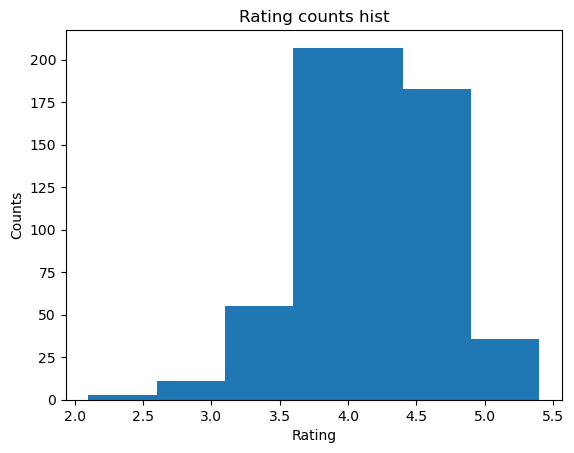

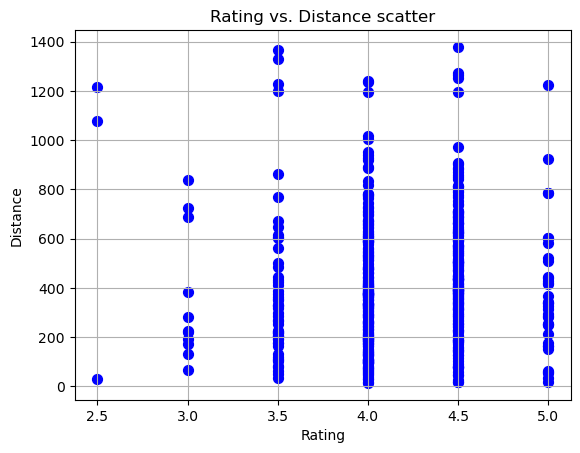

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

merget_df_no_zero_rating=merged_df[(merged_df['Rating'] != 0)]
ratings_counts = merget_df_no_zero_rating['Rating'].value_counts()
plt.bar(ratings_counts.index,ratings_counts.values)
plt.title('Rating counts hist')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.show()

# Assuming you have a DataFrame named df with columns 'Distance' and 'Rating'
# Replace 'df' with the name of your DataFrame
merget_df_no_zero_rating.plot.scatter(x='Rating', y='Distance', c='blue', marker='o', s=50)
plt.title('Rating vs. Distance scatter')
plt.xlabel('Rating')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


**Can make a guess that restaurants' ratings are higher if there are bike stations nearby.**
to prove it should compare restaurants ratings in general VS with bikes to see if there is any impact.

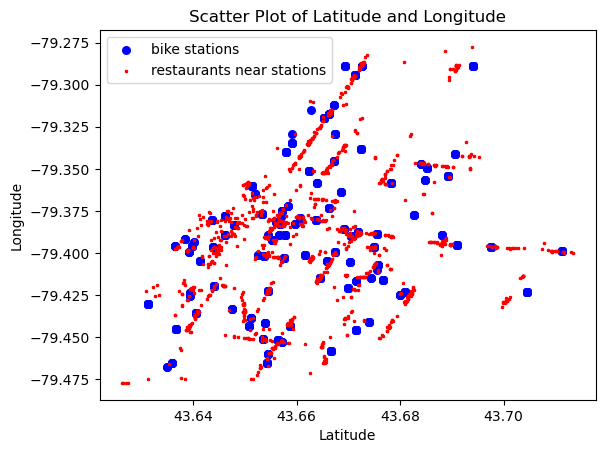

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named merged_df with columns 'Latitude_x', 'Longitude_x', 'Latitude_y', and 'Longitude_y'
# Replace 'merged_df' with the name of your DataFrame

# Create a new figure
plt.figure()

# Scatter plot for the first set of points (c='blue', marker='o')
plt.scatter(merged_df['Latitude_y'], merged_df['Longitude_y'], c='blue', marker='o', s=30, label='bike stations')

# Scatter plot for the second set of points (c='red', marker='x')
plt.scatter(merged_df['Latitude_x'], merged_df['Longitude_x'], c='red', marker='x', s=3, label='restaurants near stations')

# Set labels for the x-axis and y-axis
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Set the title of the plot
plt.title('Scatter Plot of Latitude and Longitude')

# Show the legend
plt.legend()

# Show the plot
plt.show()

**Was looking for bike stations without or with less restaurants but looks like there are enough restaurants around the bike stations.**

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [114]:
import sqlite3

# Create a connection to the database
conn = sqlite3.connect('Restaurants_near_bike_stations.db')

# Save the DataFrame to the database
merged_df.to_sql('combined_data', conn, index=False, if_exists='replace')

# Close the connection
conn.close()

Look at the data before and after the join to validate your data.

In [119]:

# Check number of rows before and after the join
print("Number of rows in fqr_restaurant_df_selected:", len(fqr_restaurant_df_selected))
print("Number of rows in yelp_restaurant_df_selected:", len(yelp_restaurant_df_selected))
print("Number of rows in df_bike:", len(df_bike))
print("Number of rows in merged_df:", len(merged_df))
print("Difference between fqr&yelp rows and merged_df:"),(len(fqr_restaurant_df_selected)+len(yelp_restaurant_df_selected)-len(merged_df))



Number of rows in fqr_restaurant_df_selected: 977
Number of rows in yelp_restaurant_df_selected: 994
Number of rows in df_bike: 674
Number of rows in merged_df: 1971
Difference between fqr&yelp rows and merged_df:


(None, 0)